<a href="https://colab.research.google.com/github/shaya-686/AI/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B4%D0%B0%D0%BD%D0%B8%D1%852.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/weatherHistory.csv")

In [13]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Завдання 1
Виведіть основні числові характеристики для числових ознак. Що потрібно зробити з стовпчиком `Loud Cover`?

In [14]:
df.describe()



,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [15]:
df = df.drop('Loud Cover', axis = 1)

In [17]:
df.columns = df.columns.str.lower()

# Завдання 2
Подивіться на отриману таблицю, особливо на характеристики `min` та `max`, для яких ознак потрібно побудувати ящики з вусами в першу чергу? Для решти намалюйте гістограми.


<Axes: >

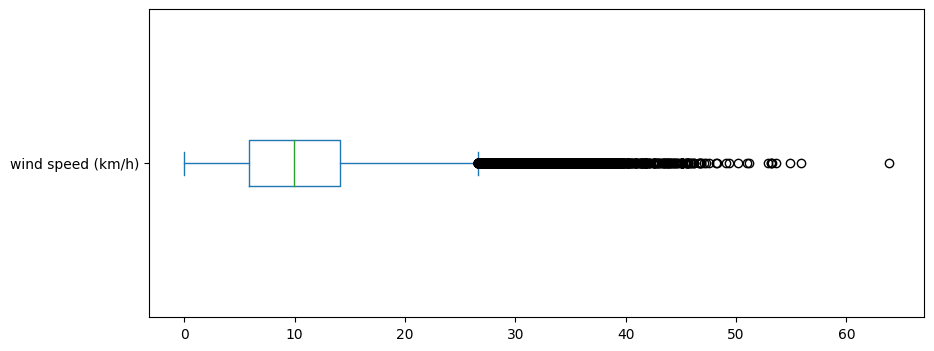

In [29]:
df['wind speed (km/h)'].plot(kind='box', vert=False, figsize=(10,4))

<Axes: >

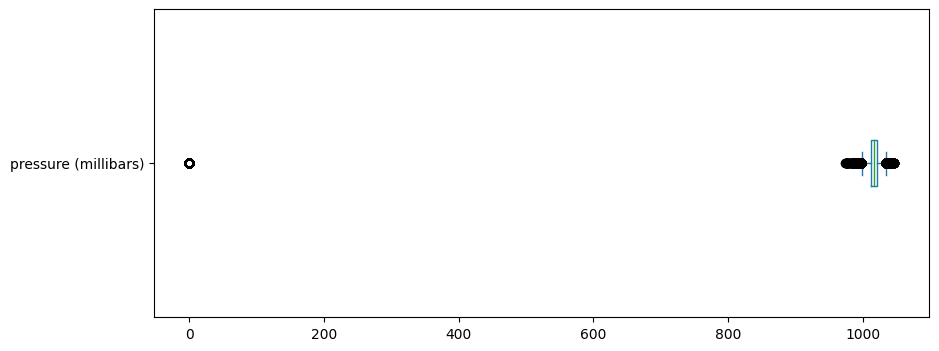

In [38]:
df['pressure (millibars)'].plot(kind='box', vert=False, figsize=(10,4))

<Axes: ylabel='Frequency'>

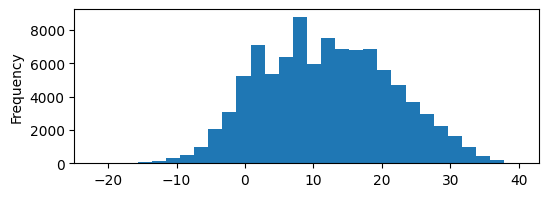

In [24]:
df['temperature (c)'].plot(kind='hist', bins=30, figsize=(6,2))

<Axes: ylabel='Frequency'>

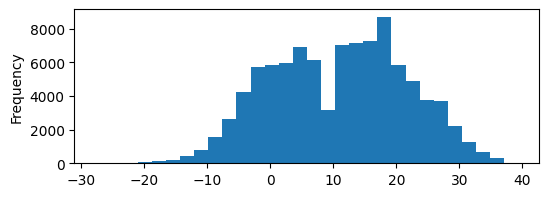

In [25]:
df['apparent temperature (c)'].plot(kind='hist', bins=30, figsize=(6,2))

<Axes: ylabel='Frequency'>

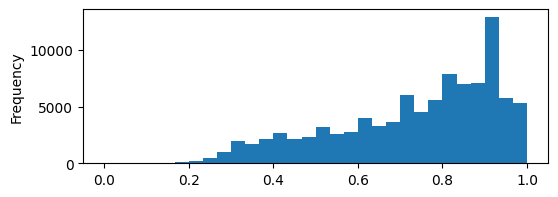

In [26]:
df['humidity'].plot(kind='hist', bins=30, figsize=(6,2))

<Axes: ylabel='Frequency'>

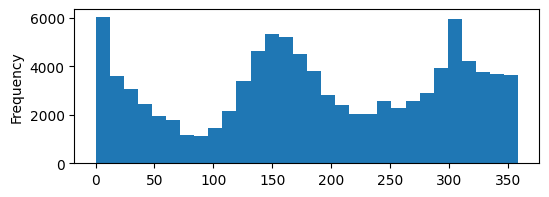

In [27]:
df['wind bearing (degrees)'].plot(kind='hist', bins=30, figsize=(6,2))

<Axes: ylabel='Frequency'>

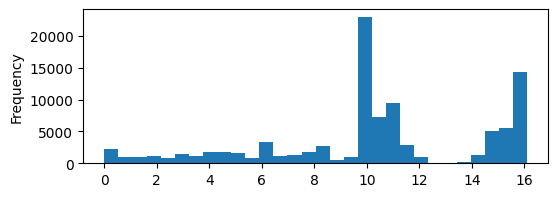

In [30]:
df['visibility (km)'].plot(kind='hist', bins=30, figsize=(6,2))

# Завдання 3
Чи потрібно застосувати квантильний алгоритм для видалення викидів? Якщо так то застосуйте, інакше, що на вашу думку потрібно зробити?

In [40]:
column = df['wind speed (km/h)']

q1 = column.quantile(q=0.25)
q3 = column.quantile(q=0.75)

iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

mask = (column >= lower) & (column <= upper)
df = df[mask]
df.shape

(93425, 11)

<Axes: >

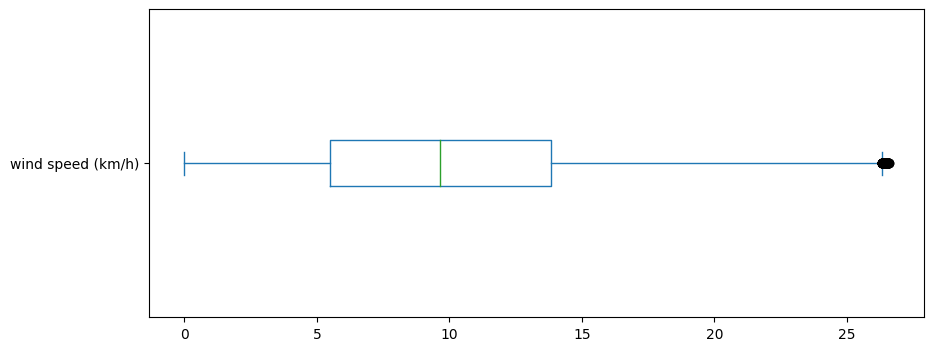

In [41]:
df['wind speed (km/h)'].plot(kind='box', vert=False, figsize=(10,4))

In [46]:
mask = df['pressure (millibars)'] == 0
df[mask]['pressure (millibars)'].count()
df = df[~mask]

<Axes: >

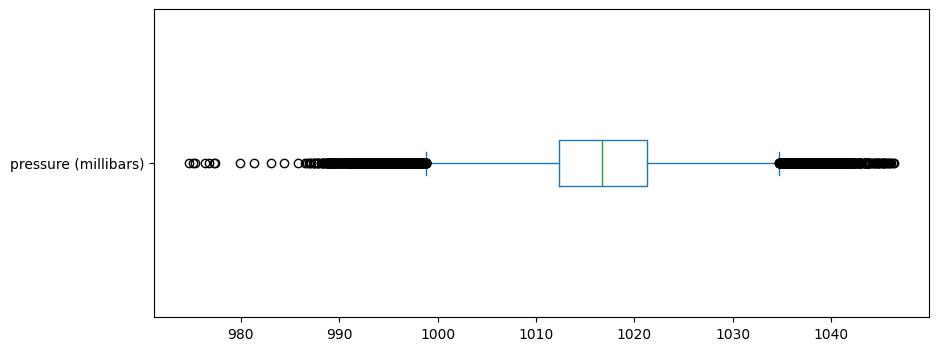

In [47]:
df['pressure (millibars)'].plot(kind='box', vert=False, figsize=(10,4))

In [48]:
column = df['pressure (millibars)']

q1 = column.quantile(q=0.25)
q3 = column.quantile(q=0.75)

iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

mask = (column >= lower) & (column <= upper)
df = df[mask]
df.shape

(89109, 11)

<Axes: >

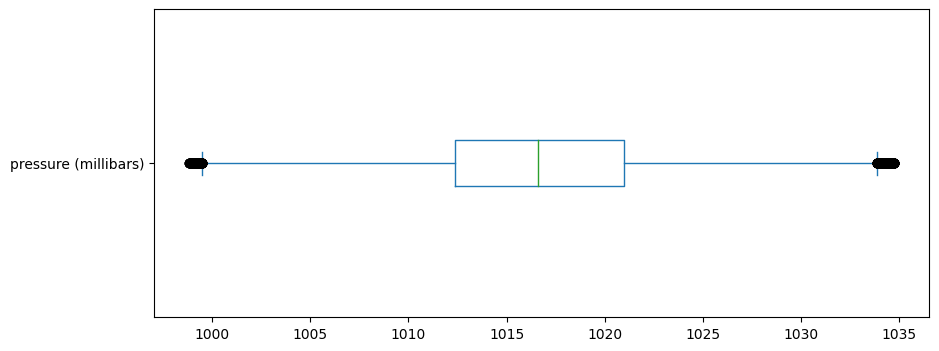

In [51]:
df['pressure (millibars)'].plot(kind='box', vert=False, figsize=(10,4))

# Завдання 4
Намалюйте матрицю кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму

In [50]:
corr = df.select_dtypes(include='number').corr(method='pearson')
corr

,temperature (c),apparent temperature (c),humidity,wind speed (km/h),wind bearing (degrees),visibility (km),pressure (millibars)
temperature (c),1.000000,0.993491,-0.643287,0.020893,0.026035,0.388410,-0.310985
apparent temperature (c),0.993491,1.000000,-0.615383,-0.038574,0.026399,0.380548,-0.295371
humidity,-0.643287,-0.615383,1.000000,-0.224660,0.010091,-0.361868,0.037772
wind speed (km/h),0.020893,-0.038574,-0.224660,1.000000,0.080463,0.092807,-0.195542
wind bearing (degrees),0.026035,0.026399,0.010091,0.080463,1.000000,0.050253,-0.074529
visibility (km),0.388410,0.380548,-0.361868,0.092807,0.050253,1.000000,-0.151734
pressure (millibars),-0.310985,-0.295371,0.037772,-0.195542,-0.074529,-0.151734,1.000000


In [55]:
corr = df.select_dtypes(include='number').corr(method='spearman')
corr

,temperature (c),apparent temperature (c),humidity,wind speed (km/h),wind bearing (degrees),visibility (km),pressure (millibars)
temperature (c),1.000000,0.996863,-0.602455,0.015461,0.026708,0.389262,-0.311351
apparent temperature (c),0.996863,1.000000,-0.590207,-0.032268,0.025762,0.376836,-0.296327
humidity,-0.602455,-0.590207,1.000000,-0.251504,0.006315,-0.424689,0.039338
wind speed (km/h),0.015461,-0.032268,-0.251504,1.000000,0.072157,0.082825,-0.183857
wind bearing (degrees),0.026708,0.025762,0.006315,0.072157,1.000000,0.053472,-0.067070
visibility (km),0.389262,0.376836,-0.424689,0.082825,0.053472,1.000000,-0.135445
pressure (millibars),-0.311351,-0.296327,0.039338,-0.183857,-0.067070,-0.135445,1.000000


<Axes: xlabel='apparent temperature (c)', ylabel='temperature (c)'>

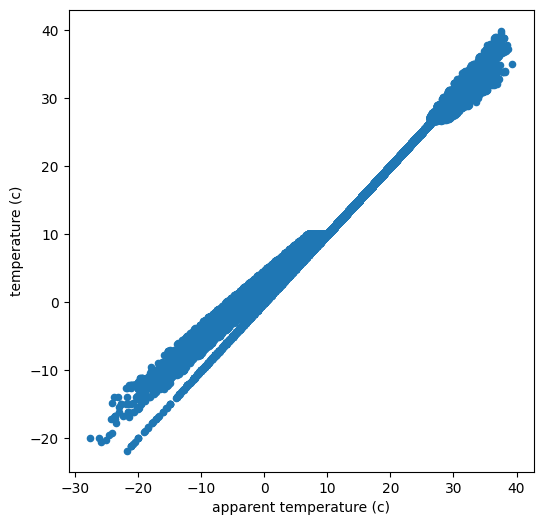

In [53]:
df.plot(kind='scatter', x='apparent temperature (c)', y='temperature (c)', figsize=(6,6))

<Axes: xlabel='humidity', ylabel='temperature (c)'>

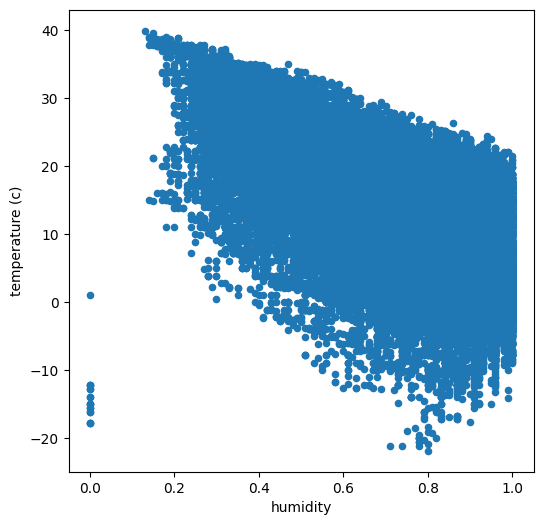

In [54]:
df.plot(kind='scatter', x='humidity', y='temperature (c)', figsize=(6,6))

# Завдання 5
Виведіть характеристики для категоріальних ознак

In [56]:
df.describe(include='object')

,formatted date,summary,precip type,daily summary
count,89109,89109,88614,89109
unique,89085,14,2,212
top,2010-08-02 15:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,30810,79649,19219


# Завдання 6
Виведіть групові ящики з вусами по одній(або декількох) категоріальних ознак. Що по них можна сказати?

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'Clear'),
  Text(2, 0, 'Drizzle'),
  Text(3, 0, 'Dry'),
  Text(4, 0, 'Dry and Mostly Cloudy'),
  Text(5, 0, 'Dry and Partly Cloudy'),
  Text(6, 0, 'Foggy'),
  Text(7, 0, 'Humid and Mostly Cloudy'),
  Text(8, 0, 'Humid and Overcast'),
  Text(9, 0, 'Humid and Partly Cloudy'),
  Text(10, 0, 'Light Rain'),
  Text(11, 0, 'Mostly Cloudy'),
  Text(12, 0, 'Overcast'),
  Text(13, 0, 'Partly Cloudy'),
  Text(14, 0, 'Rain')])

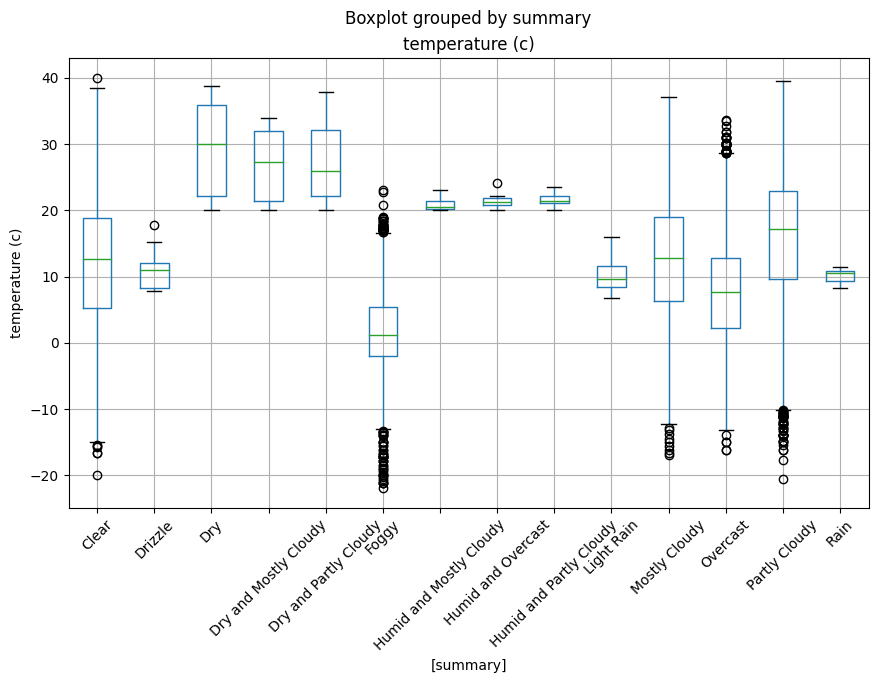

In [64]:
ax = df[['summary', 'temperature (c)']].boxplot(by='summary', figsize=(10,6))
ax.set_ylabel('temperature (c)')
plt.xticks(rotation=45)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'Clear'),
  Text(2, 0, 'Drizzle'),
  Text(3, 0, 'Dry'),
  Text(4, 0, 'Dry and Mostly Cloudy'),
  Text(5, 0, 'Dry and Partly Cloudy'),
  Text(6, 0, 'Foggy'),
  Text(7, 0, 'Humid and Mostly Cloudy'),
  Text(8, 0, 'Humid and Overcast'),
  Text(9, 0, 'Humid and Partly Cloudy'),
  Text(10, 0, 'Light Rain'),
  Text(11, 0, 'Mostly Cloudy'),
  Text(12, 0, 'Overcast'),
  Text(13, 0, 'Partly Cloudy'),
  Text(14, 0, 'Rain')])

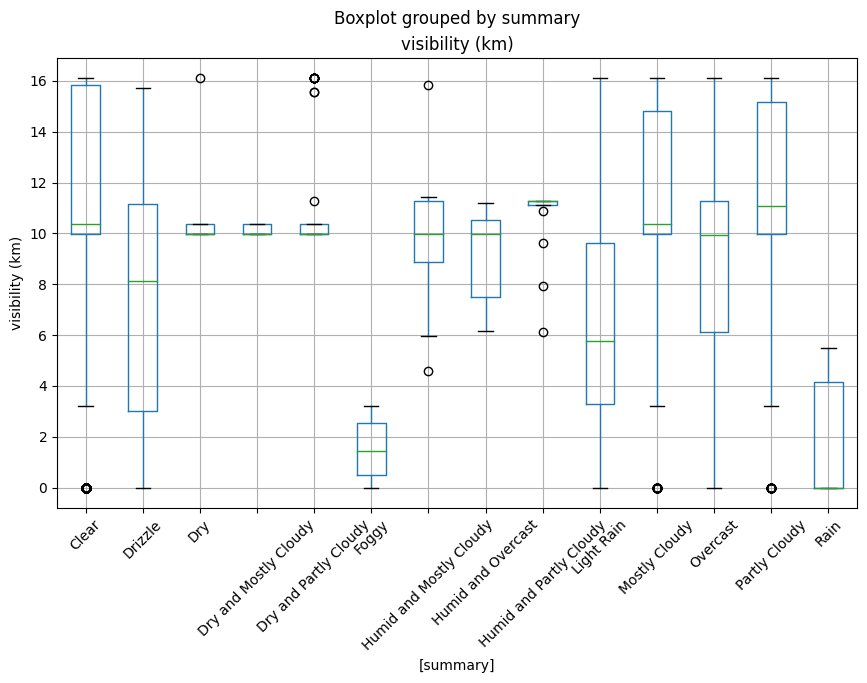

In [65]:
ax = df[['summary', 'visibility (km)']].boxplot(by='summary', figsize=(10,6))
ax.set_ylabel('visibility (km)')
plt.xticks(rotation=45)

(array([1, 2]), [Text(1, 0, 'rain'), Text(2, 0, 'snow')])

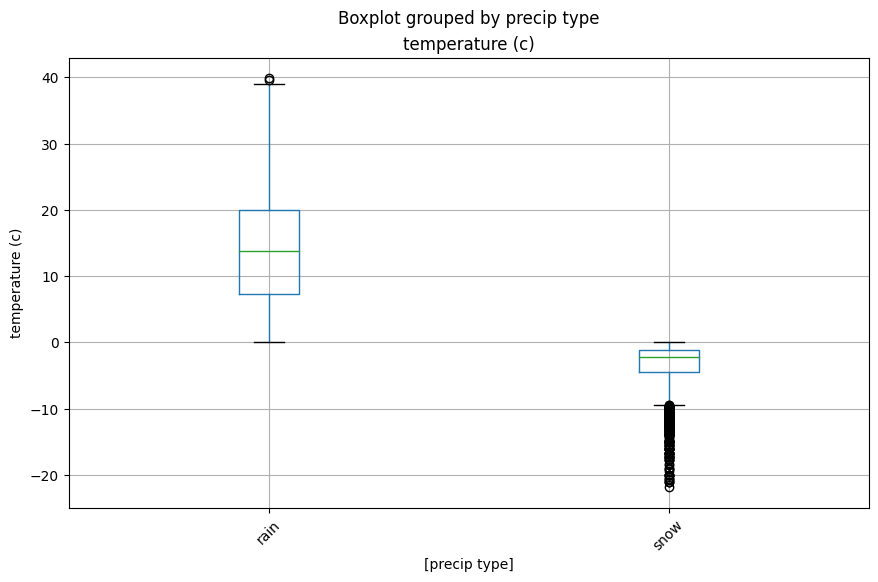

In [66]:
ax = df[['precip type', 'temperature (c)']].boxplot(by='precip type', figsize=(10,6))
ax.set_ylabel('temperature (c)')
plt.xticks(rotation=45)